#Yelp - Data Cleaning

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ast
import operator

In [0]:
business = pd.read_csv('business.csv')

In [0]:
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,NaN,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",NaN,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


I will remove the address column since we get the latitude and longitude. 

We can see that the attributes and hours were saved as dicstionary while categories was seperated by comma.

In [0]:
business.drop(columns="address", inplace=True)

In [0]:
business.dtypes

attributes       object
business_id      object
categories       object
city             object
hours            object
is_open           int64
latitude        float64
longitude       float64
name             object
postal_code      object
review_count      int64
stars           float64
state            object
dtype: object

In [0]:
business.shape

(192609, 13)

### Missing Value



In [0]:
business.isnull().sum()

attributes      28836
business_id         0
categories        482
city                1
hours           44830
is_open             0
latitude            0
longitude           0
name                0
postal_code       659
review_count        0
stars               0
state               0
dtype: int64

In [0]:
business = business[pd.notna(business.categories)]

In [0]:
business.isnull().sum()

attributes      28354
business_id         0
categories          0
city                1
hours           44349
is_open             0
latitude            0
longitude           0
name                0
postal_code       659
review_count        0
stars               0
state               0
dtype: int64

We removed null values from the categories. Later on, check the null value in city.

In [0]:
business[business['city'].isnull()]

,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
34070,"{'BusinessParking': ""{'garage': False, 'street...",WpC53SqwoCY5AuYIFr_1eA,"Soccer, Active Life",NaN,NaN,1,33.338097,-111.677975,NSFC Strikers Soccer Complex,NaN,3,2.5,AZ


I googled it and found it is a soccer club in Mesa, AZ. But since we are not intereset in soccer club, we can just drop it.

In [0]:
business = business[pd.notna(business.city)]

In [0]:
business.isnull().sum()

attributes      28354
business_id         0
categories          0
city                0
hours           44348
is_open             0
latitude            0
longitude           0
name                0
postal_code       658
review_count        0
stars               0
state               0
dtype: int64

We are only interesting in business in the US.

In [0]:
american_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',\
                   'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',\
                   'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',\
                   'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',\
                   'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'] 
                  

In [0]:
business = business[business.state.isin(american_states)]

In [0]:
business.shape

(141585, 13)

Our data only left 141585 observations after we removed the states besides America.

We can use postal code to double-check(postal code in America is XXXXX.)

In [0]:
business[pd.notna(business.postal_code)][business.postal_code.map(str).apply(len) != 5 ]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
48182,{'ByAppointmentOnly': 'False'},pL6TxdAOeYICTfbc8g2ZRA,"Property Management, Real Estate, Home Services",Las Vegas,NaN,1,36.081028,-115.241900,Pinnacle Realty Management,891118,8,1.0,NV
83767,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",tJRDll5yqpZwehenzE2cSg,"Hotels, Hotels & Travel, Bed & Breakfast, Even...",Alburg,"{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",1,44.953815,-73.270500,Ransom Bay Inn B & B,5440,5,5.0,VT
84473,{'BusinessAcceptsCreditCards': 'False'},MErXuVEC2gI_u-W_hm2STw,"Bikes, Bike Repair/Maintenance, Shopping, Bike...",Mesa,NaN,1,33.404513,-111.648627,Christopher Metcalfe Creations,2645,4,5.0,AZ
85200,"{'RestaurantsPriceRange2': '3', 'BusinessAccep...",9WHm5xU_3EXai-NWrmWRZQ,"Women's Clothing, Shopping, Accessories, Fashion",Litchfield,NaN,1,41.567551,-81.505163,Hayseed,6759,3,1.5,CT
97674,{'ByAppointmentOnly': 'False'},_WbkQha0xqf2DnYumHAaqg,"Tree Services, Home Services",Alburgh,NaN,1,44.974354,-73.300597,Island Tree Service,5440,3,3.5,VT
160259,{'BusinessAcceptsCreditCards': 'True'},6kSvyueHgjLragjJWoAaJg,"Automotive, Oil Change Stations, Auto Parts & ...",Glendale,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,33.664516,-112.202635,Go2lube,6897,4,5.0,CT
160820,NaN,KhxKu4hXR4YOcpAKI7p2vQ,"Tickets, Shopping",Las Vegas,NaN,1,36.166228,-115.192580,Tix 4 Tonight,6280,3,5.0,NV
164311,NaN,U1ln0q5CwPydtPyoIeheUg,"Pets, Pet Services, Dog Walkers, Pet Sitting",Union,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,36.016102,-115.058461,Pet Sitting by Ines,7083,8,5.0,NJ
172350,NaN,dRm2_YXSeGCqR2x92DrATA,"Web Design, Professional Services, Graphic Des...",Charlotte,"{'Monday': '8:30-17:0', 'Tuesday': '8:30-17:0'...",1,35.153197,-80.838218,ClickCom,282010,3,2.5,NC
177244,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...",wfe31gLa1qtAgiCVI0cH2g,"Restaurants, Italian",Toronto,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",1,43.625879,-79.504026,Pastucci's,M8Z 1N1,9,4.0,OH


We can see that Toronto and Calgary are not in America so drop them.

In [0]:
business = business.drop([177244, 185798])

We can drop postal_code as well.

In [0]:
business.drop(columns='postal_code', inplace = True)

Since attributes is saved as dictinary-like string, we need to transform it to dictionary using **ast.literal_eval**.

In [0]:
attribute_list = []
for i in business['attributes'].dropna():
  for j in ast.literal_eval(i):
    attribute_list.append(j)

In [0]:
set(attribute_list)

{'AcceptsInsurance',
 'AgesAllowed',
 'Alcohol',
 'Ambience',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DietaryRestrictions',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal',
 'HairSpecializesIn',
 'HappyHour',
 'HasTV',
 'Music',
 'NoiseLevel',
 'Open24Hours',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsCounterService',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'Smoking',
 'WheelchairAccessible',
 'WiFi'}

In [0]:
business['is_restaurant']=business['categories'].str.contains('Restaurants')
business['is_bar']=business['categories'].str.contains('Bars')
business['is_nightlife']=business['categories'].str.contains('Nightlife')

In [0]:
business.head()

,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,review_count,stars,state,is_restaurant,is_bar,is_nightlife
0,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,NaN,0,33.522143,-112.018481,Arizona Biltmore Golf Club,5,3.0,AZ,False,False,False
2,"{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0,NC,True,True,False
3,NaN,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,3,5.0,AZ,False,False,False
4,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,4,4.0,NC,False,False,False
7,"{'RestaurantsPriceRange2': '3', 'GoodForKids':...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,36.099872,-115.074574,Supercuts,3,3.5,NV,False,False,False


We would like to focus on certain topics.

In [0]:
category_list = []
for i in business['categories']:
    category_list.extend(i.split(', '))

category_set = set(category_list) #find unique category
category_count = {} 

for i in category_set:
    category_count[i] = category_list.count(i)

category_sort = sorted(category_count.items(), key=operator.itemgetter(1), reverse=True)
print(category_sort)
print(len(category_set))

[('Restaurants', 35876), ('Shopping', 24260), ('Food', 19176), ('Home Services', 18161), ('Health & Medical', 14898), ('Beauty & Spas', 14810), ('Local Services', 11884), ('Automotive', 11283), ('Nightlife', 8977), ('Event Planning & Services', 7908), ('Bars', 7729), ('Active Life', 7489), ('American (Traditional)', 5852), ('Fashion', 5749), ('Professional Services', 5654), ('Fast Food', 5422), ('Doctors', 5370), ('Real Estate', 5365), ('Sandwiches', 5318), ('Hair Salons', 5302), ('Home & Garden', 5275), ('Auto Repair', 5139), ('Arts & Entertainment', 4876), ('Pizza', 4707), ('Hotels & Travel', 4553), ('American (New)', 4269), ('Coffee & Tea', 4193), ('Mexican', 3960), ('Nail Salons', 3806), ('Burgers', 3764), ('Fitness & Instruction', 3579), ('Breakfast & Brunch', 3343), ('Pets', 3267), ('Dentists', 3180), ('Hair Removal', 3018), ('Italian', 2872), ('Contractors', 2868), ('Financial Services', 2857), ('Specialty Food', 2747), ('Education', 2731), ('Skin Care', 2654), ('Apartments', 24

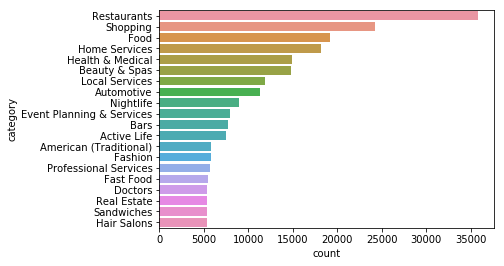

In [0]:
category_frequency = pd.DataFrame(category_sort, columns =['category', 'count'])
sns.barplot(x="count", y="category",  data=category_frequency.head(20)) 


We decided to focus on Bars and Nightlife.

In [0]:
bar_list = list(filter(lambda x: "Bars" in x, category_set))
bar_dict = {k: category_count[k] for k in bar_list}

In [0]:
bar_list

['Sushi Bars',
 'Dive Bars',
 'Drive-Thru Bars',
 'Cigar Bars',
 'Gay Bars',
 'Whiskey Bars',
 'Bars',
 'Hookah Bars',
 'Tiki Bars',
 'Piano Bars',
 'Juice Bars & Smoothies',
 'Beach Bars',
 'Tapas Bars',
 'Oxygen Bars',
 'Champagne Bars',
 'Wine Bars',
 'Cocktail Bars',
 'Sports Bars']

In [0]:
bar_dict

{'Bars': 7729,
 'Beach Bars': 3,
 'Champagne Bars': 16,
 'Cigar Bars': 22,
 'Cocktail Bars': 837,
 'Dive Bars': 500,
 'Drive-Thru Bars': 1,
 'Gay Bars': 134,
 'Hookah Bars': 221,
 'Juice Bars & Smoothies': 1203,
 'Oxygen Bars': 17,
 'Piano Bars': 23,
 'Sports Bars': 1708,
 'Sushi Bars': 1126,
 'Tapas Bars': 175,
 'Tiki Bars': 12,
 'Whiskey Bars': 38,
 'Wine Bars': 813}

In [0]:
list(filter(lambda x: "Nightlife" in x, category_set))

['Nightlife']

Not sure if we noly need to check business that is open.

In [0]:
print(business[business['is_open'] == 1]['review_count'].sum())
print(business[business['is_open'] == 0]['review_count'].sum())

In [0]:
ast.literal_eval(business.loc[0,'attributes'])

{'GoodForKids': 'False'}

In [0]:
#business.to_csv('business_clean1.csv')